Fix `fullwavepy` reported by Michele.

#### Notebook config

In [47]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
%autoreload 2

In [49]:
# %load ~/software/fullwavepy/fullwavepy/config/jupyter.py 
from fullwavepy import * # Load modules imported in fullwavepy/__init__.py
# -----------------------------------------------------------------------------
# Set aliases of frequently used jupyter magic commands
# -----------------------------------------------------------------------------
%alias_magic mi matplotlib -p inline
%alias_magic mn matplotlib -p notebook
# -----------------------------------------------------------------------------
# Set matplotlib backend
# -----------------------------------------------------------------------------
# non-interactive plots displayed in a notebook cell
%matplotlib inline
# interactive plots displayed in a notebook cell
# %matplotlib notebook (interactive version)
# -----------------------------------------------------------------------------
# Set matplotlib style
# ----------------------------------------------------------------------------
plt.style.reload_library()
# a combined style (right overwrites left wherever they overlap):
plt.style.use(['default', 'ggplot'])
# print(plt.style.available) 
# -----------------------------------------------------------------------------
# Configure logging
# -----------------------------------------------------------------------------
# Set up loggers, handlers and load the log_lvl function
from fullwavepy.config.logging import *
# -----------------------------------------------------------------------------
# Set level of log-messages
log_lvl(ERROR) 
# Other options in order of increasing importance and 
# decreasing verbosity:
# TRACE, DEBUG, INFO, WARNING, ERROR, CRITICAL
# or using integers: 0, 10, 20, 30, 40, 50, respectively
# -----------------------------------------------------------------------------
# Autocompleting
# -----------------------------------------------------------------------------
#  Not sure if it works
#%config IPCompleter.greedy=True 
# -----------------------------------------------------------------------------
# Automatically reload modules before execution
#%load_ext autoreload
#%autoreload 23

Created `%mi` as an alias for `%matplotlib inline`.
Created `%mn` as an alias for `%matplotlib notebook`.


# Test01
Just a runfile and sources/receivers files.

In [11]:
lll(30)
path = '/home/kajetan/software/fullwavepy/examples/kolumbo/'
geom = {'box': [8000.0, 25000.0, -3000.0, 15000.0, 0, 4000.0],
 'dt': 0.0025,
 'dx': 50,
 'ns': 2000}
p14 = ProjInv('p14', path=path, cat=0, **geom)
p = p14

In [21]:
p.ls()

Content of /home/kajetan/software/fullwavepy/examples/kolumbo/p14/inp

total 104K
-rwx------ 1 kajetan kajetan 1,1K lip  6 21:03 p14-Sources.geo
-rwx------ 1 kajetan kajetan  93K lip  6 21:03 p14-Receivers.geo
-rwx------ 1 kajetan kajetan 3,2K lip  6 21:02 p14-Runfile.key
 
Content of /home/kajetan/software/fullwavepy/examples/kolumbo/p14/out

total 0
 


This is read from runfile (iteration-blocks are parsed)

In [50]:
len(p.o.dc.it)

161

In [19]:
print(p.o.dc.it[1].items())

dict_items([(4104, <fullwavepy.project.files.datalike.ttr.DumpCompareFile object at 0x7f2753495d60>), (4105, <fullwavepy.project.files.datalike.ttr.DumpCompareFile object at 0x7f2753495df0>), (4109, <fullwavepy.project.files.datalike.ttr.DumpCompareFile object at 0x7f2753495f70>), (4110, <fullwavepy.project.files.datalike.ttr.DumpCompareFile object at 0x7f2753495fd0>), (4112, <fullwavepy.project.files.datalike.ttr.DumpCompareFile object at 0x7f27534990a0>), (4123, <fullwavepy.project.files.datalike.ttr.DumpCompareFile object at 0x7f2753499130>), (4124, <fullwavepy.project.files.datalike.ttr.DumpCompareFile object at 0x7f27534991c0>), (4125, <fullwavepy.project.files.datalike.ttr.DumpCompareFile object at 0x7f2753499250>), (4137, <fullwavepy.project.files.datalike.ttr.DumpCompareFile object at 0x7f27534992e0>), (4138, <fullwavepy.project.files.datalike.ttr.DumpCompareFile object at 0x7f2753499370>), (4139, <fullwavepy.project.files.datalike.ttr.DumpCompareFile object at 0x7f2753499400>)

# Test02
Plot actual dump data files.

In [32]:
lll(30)
path = '/home/kajetan/software/fullwavepy/examples/kolumbo/'
geom = {'box': [8000.0, 25000.0, -3000.0, 15000.0, 0, 4000.0],
 'dt': 0.0025,
 'dx': 50,
 'ns': 2000}
p14 = ProjInv('p14', path=path, cat=0, **geom)
p = p14

In [23]:
p.ls()

Content of /home/kajetan/software/fullwavepy/examples/kolumbo/p14/inp

total 104K
-rwx------ 1 kajetan kajetan 1,1K lip  6 21:03 p14-Sources.geo
-rwx------ 1 kajetan kajetan  93K lip  6 21:03 p14-Receivers.geo
-rwx------ 1 kajetan kajetan 3,2K lip  6 21:02 p14-Runfile.key
 
Content of /home/kajetan/software/fullwavepy/examples/kolumbo/p14/out

total 22M
-rwx------ 1 kajetan kajetan 22M lip  7 13:28 p14-SLAVES_DUMPCOMPARE-csref04125-iter00001fwd1.mmp
 


This needs Observed.sgy for some metadata.

In [24]:
dc = p.o.dc.it[1][4125].read()

FileNotFoundError: /home/kajetan/software/fullwavepy/examples/kolumbo//p14//inp/p14-Observed.sgy

In [25]:
p.i.ls()

Content of /home/kajetan/software/fullwavepy/examples/kolumbo/p14/inp

total 2,2M
-rwx------ 1 kajetan kajetan 2,1M lip  7 13:31 p14-Observed_HEAD.csv
-rwx------ 1 kajetan kajetan 1,1K lip  6 21:03 p14-Sources.geo
-rwx------ 1 kajetan kajetan  93K lip  6 21:03 p14-Receivers.geo
-rwx------ 1 kajetan kajetan 3,2K lip  6 21:02 p14-Runfile.key
 


In [26]:
p14.o.dc.it[1][4125].plot_phase(freq=3)

FileNotFoundError: /home/kajetan/software/fullwavepy/examples/kolumbo//p14//inp/p14-Observed.sgy

# Test03
Let's try do it step by step without Observed.sgy.

It needs SegyPrep.key for some reason.

In [30]:
p14.o.dc.it[1][4125].read()

FileNotFoundError: [Errno 2] No such file or directory: '/home/kajetan/software/fullwavepy/examples/kolumbo//p14//inp/p14-SegyPrep.key'

In [29]:
p14.o.dc.it[1][4125]._get_phase(freq=3)

FileNotFoundError: [Errno 2] No such file or directory: '/home/kajetan/software/fullwavepy/examples/kolumbo//p14//inp/p14-SegyPrep.key'

# Test04
[WORKING] Plot actual dump data files. Now with Observed.sgy and SegyPrep.key

In [52]:
lll(30)
path = '/home/kajetan/software/fullwavepy/examples/kolumbo/'
geom = {'box': [8000.0, 25000.0, -3000.0, 15000.0, 0, 4000.0],
 'dt': 0.0025,
 'dx': 50,
 'ns': 2000}
p14 = ProjInv('p14', path=path, cat=0, **geom)
p = p14

This needs Observed.sgy for some metadata.

In [35]:
dc = p.o.dc.it[1][4125].read()

/home/kajetan/software/fullwavepy/fullwavepy/project/files/datalike/ttr.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['offset3d'] = np.sqrt((df['sx'] - df['gx'])**2 +


In [42]:
p.o.fw

In [43]:
p.o.bw

In [45]:
p.o.dc.nits_total

160

In [44]:
p.i.rnf.cat()

Content of  /home/kajetan/software/fullwavepy/examples/kolumbo//p14//inp/p14-Runfile.key : 

    ! May 2019, K. Chrapkiewicz 
    ! THIS RUNFILE CONFORMS TO
    ! FULLWAVE REV. 688 STANDARD
    
    
    ! A. PROBLEM DEFINITION
     problem       : tomography
     domain        : time
     dim           : 3d
     equation      : acoustic
     units         : metric
     anisotropy    : none
     kernel        : low
    
     
    ! B. MODEL DEFINITION
     nx1           : 341
     nx2           : 361
     nx3           : 81
     dx            : 50.0000000
    
     
    ! C. DATA DEFINITION
     ncomp         : 16
     nshots        : 16
     nrecs         : 1481
     maxrc         : 1144
     maxps         : 1
     io            : segy
    
     
    ! D. BOUNDARY CONDITIONS
     btop          : 0
     bbot          : 40
     bleft         : 40
     bright        : 40
     bfront        : 40
     bback         : 40
     
     etop          : 0
     ebot          : 50
     elef        

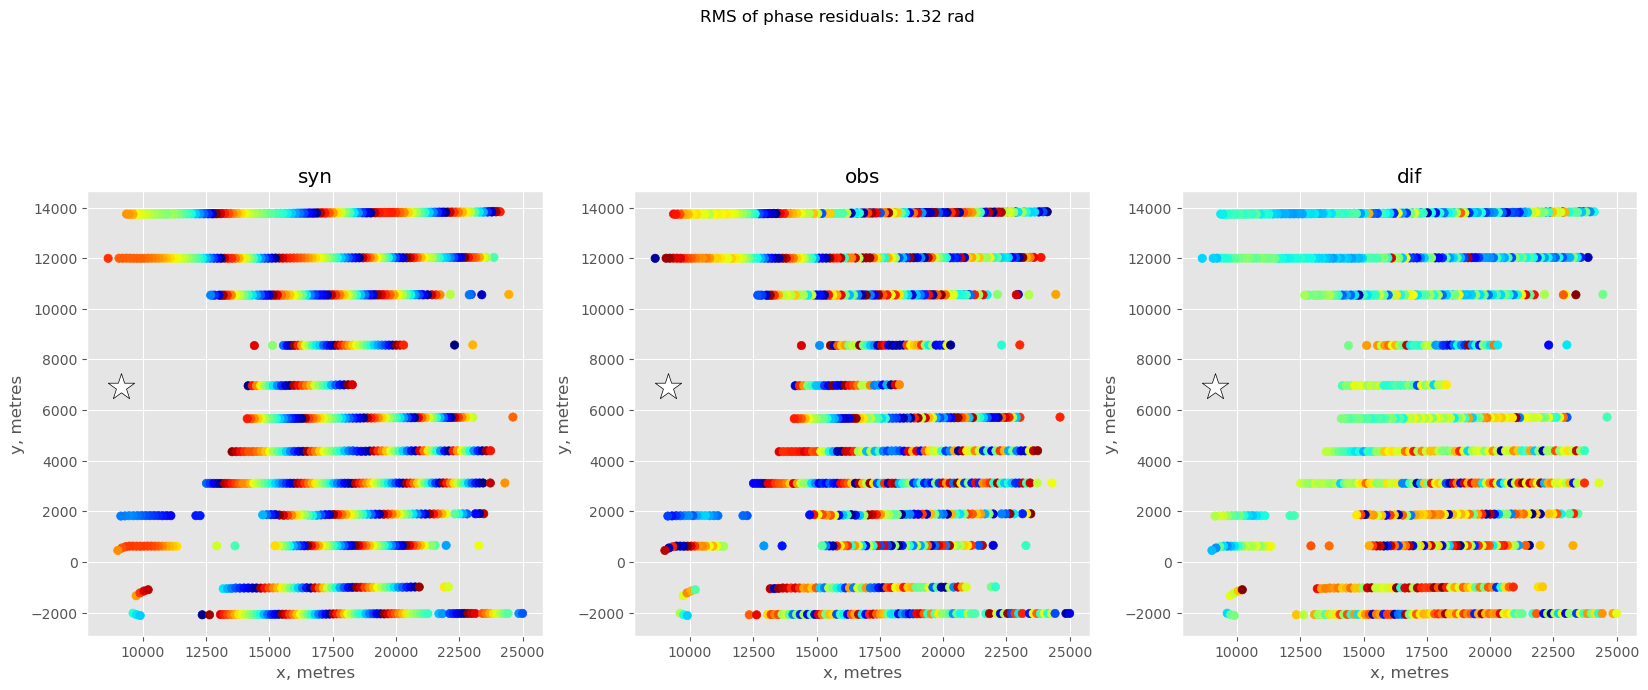

In [41]:
p.o.dc.it[1][4125].plot_phase(freq=3)

# Test05
[SOLVED] Removing iterations blocks from the Runfile reproduces Michele's error.

In [46]:
lll(30)
path = '/home/kajetan/software/fullwavepy/examples/kolumbo/'
geom = {'box': [8000.0, 25000.0, -3000.0, 15000.0, 0, 4000.0],
 'dt': 0.0025,
 'dx': 50,
 'ns': 2000}
p14 = ProjInv('p14', path=path, cat=0, **geom)
p = p14

IndexError: list assignment index out of range

# Test06
Testing another error.

In [54]:
lll(30)
path = '/home/kajetan/software/fullwavepy/examples/kolumbo/'
geom = {'box': [8000.0, 25000.0, -3000.0, 15000.0, 0, 4000.0],
 'dt': 0.0025,
 'dx': 50,
 'ns': 2000}
p14 = ProjInv('p14', path=path, cat=0, **geom)
p = p14

In [58]:
p.o.dc.load

<bound method DumpFileList.load of <fullwavepy.project.lists.extra.DumpFileList object at 0x7f275189caf0>>

In [59]:
p.o.dc.load()

range(1, 161)
[4104, 4105, 4109, 4110, 4112, 4123, 4124, 4125, 4137, 4138, 4139, 4157, 4158, 4176, 4177, 4178]
[5, 6, 7, 8, 9, 10, 22, 23, 26, 27, 30, 31, 37, 38]


In [61]:
p.i.ls()

Content of /home/kajetan/software/fullwavepy/examples/kolumbo/p14/inp

total 126M
-rwx------ 1 kajetan kajetan 2,1M lip 11 15:27 p14-Observed_HEAD.csv
-rwx------ 1 kajetan kajetan 3,2K lip 11 15:16 p14-Runfile.key
-rwx------ 1 kajetan kajetan 2,8K lip 11 15:16 p14-Runfile.key_no_it_blocks
-rwx------ 1 kajetan kajetan 3,2K lip  7 14:16 p14-Runfile.key_bckp
-rwx------ 1 kajetan kajetan  399 lip  7 13:54 p14-SegyPrep.key
-rwx------ 1 kajetan kajetan 123M lip  7 13:49 p14-Observed.sgy
-rwx------ 1 kajetan kajetan 978K lip  7 13:47 p14-Observed.hed
-rwx------ 1 kajetan kajetan 1,1K lip  6 21:03 p14-Sources.geo
-rwx------ 1 kajetan kajetan  93K lip  6 21:03 p14-Receivers.geo
 


In [62]:
p.o.dc.it[1][4125].read()

{'syn': Data([[[0., 0., 0., ..., 0., 0., 0.]],
 
       [[0., 0., 0., ..., 0., 0., 0.]],
 
       [[0., 0., 0., ..., 0., 0., 0.]],
 
       ...,
 
       [[0., 0., 0., ..., 0., 0., 0.]],
 
       [[0., 0., 0., ..., 0., 0., 0.]],
 
       [[0., 0., 0., ..., 0., 0., 0.]]], dtype=float32),
 'obs': Data([[[0., 0., 0., ..., 0., 0., 0.]],
 
       [[0., 0., 0., ..., 0., 0., 0.]],
 
       [[0., 0., 0., ..., 0., 0., 0.]],
 
       ...,
 
       [[0., 0., 0., ..., 0., 0., 0.]],
 
       [[0., 0., 0., ..., 0., 0., 0.]],
 
       [[0., 0., 0., ..., 0., 0., 0.]]], dtype=float32),
 'dif': Data([[[0., 0., 0., ..., 0., 0., 0.]],
 
       [[0., 0., 0., ..., 0., 0., 0.]],
 
       [[0., 0., 0., ..., 0., 0., 0.]],
 
       ...,
 
       [[0., 0., 0., ..., 0., 0., 0.]],
 
       [[0., 0., 0., ..., 0., 0., 0.]],
 
       [[0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)}

In [63]:
p.o.dc.it[1][4125]._get_phase(freq=3)

{'syn': array([ 1.6153099 ,  1.44391024,  1.29836985,  0.78792348,  0.64713729,
         0.51623949,  0.39692312,  0.27263321,  0.15818708,  0.04111375,
        -0.0426129 ,  0.18917936,  0.02923782, -0.15906119, -0.37424218,
        -0.63919232, -0.94228396, -1.25795033, -1.58926369, -1.91957505,
        -2.61460967, -2.96344121,  2.94486579,  2.54731575,  2.20900949,
         1.85609723,  1.24329224,  0.94872591,  0.69579018,  0.47865687,
         0.28243343,  0.09693384, -0.06435896, -0.19945412, -0.47152346,
        -0.62193313, -0.79472456, -0.9975731 , -1.22738138, -1.48500629,
        -1.7735466 , -2.0969531 , -2.45986013, -2.82822788,  3.05153857,
         2.63378229,  2.21837286,  1.75438676,  1.30140706,  0.83690694,
         0.36648311, -0.13012204, -0.62422114, -1.13927724, -1.69032169,
        -2.22580225, -2.74504934,  3.01555054,  2.58131196,  2.34806397,
         2.30767784,  2.3943656 ,  2.329348  ,  2.06958773,  1.90140277,
         1.42285992,  0.94822072,  0.4837084

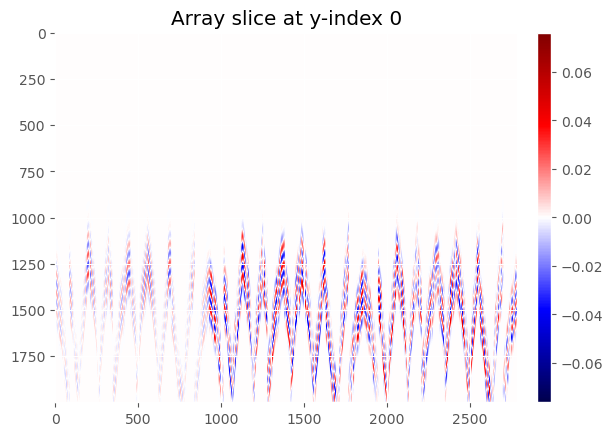

In [57]:
p.o.dc.it[1][4125].plot()

This needs Observed.sgy for some metadata.

In [35]:
dc = p.o.dc.it[1][4125].read()

/home/kajetan/software/fullwavepy/fullwavepy/project/files/datalike/ttr.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['offset3d'] = np.sqrt((df['sx'] - df['gx'])**2 +


In [42]:
p.o.fw

In [43]:
p.o.bw

In [45]:
p.o.dc.nits_total

160

In [44]:
p.i.rnf.cat()

Content of  /home/kajetan/software/fullwavepy/examples/kolumbo//p14//inp/p14-Runfile.key : 

    ! May 2019, K. Chrapkiewicz 
    ! THIS RUNFILE CONFORMS TO
    ! FULLWAVE REV. 688 STANDARD
    
    
    ! A. PROBLEM DEFINITION
     problem       : tomography
     domain        : time
     dim           : 3d
     equation      : acoustic
     units         : metric
     anisotropy    : none
     kernel        : low
    
     
    ! B. MODEL DEFINITION
     nx1           : 341
     nx2           : 361
     nx3           : 81
     dx            : 50.0000000
    
     
    ! C. DATA DEFINITION
     ncomp         : 16
     nshots        : 16
     nrecs         : 1481
     maxrc         : 1144
     maxps         : 1
     io            : segy
    
     
    ! D. BOUNDARY CONDITIONS
     btop          : 0
     bbot          : 40
     bleft         : 40
     bright        : 40
     bfront        : 40
     bback         : 40
     
     etop          : 0
     ebot          : 50
     elef        

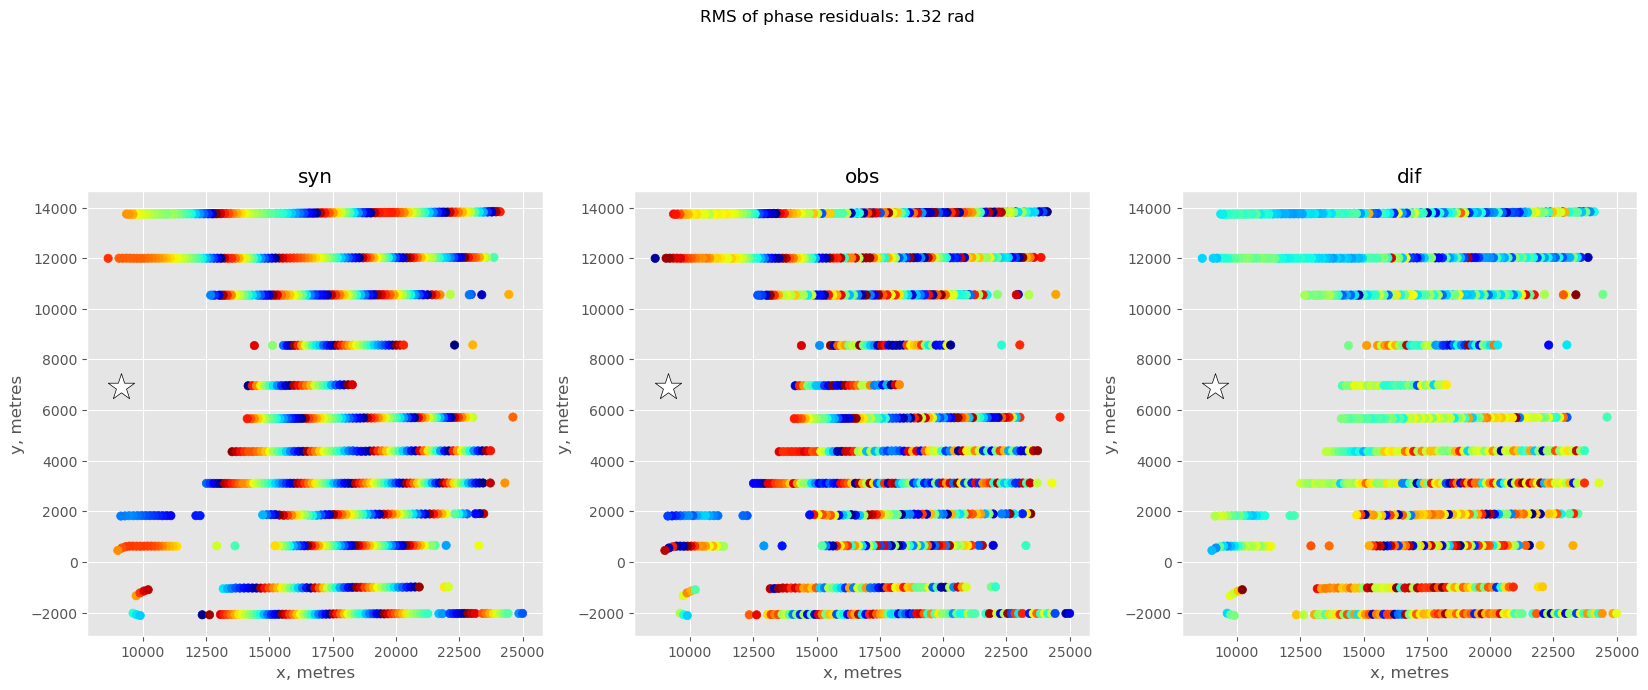

In [41]:
p.o.dc.it[1][4125].plot_phase(freq=3)

# ...